In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/content/Chennai houseing sale.csv')

In [5]:
df=data.copy()

In [6]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [9]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [10]:
df['Year'] = pd.DatetimeIndex(df['DATE_SALE']).year

In [11]:
df=df.drop('PRT_ID',axis=1)

In [12]:
df=df.drop('DATE_SALE',axis=1)

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['N_BEDROOM']=imputer.fit_transform(df[['N_BEDROOM']])
df['N_BATHROOM']=imputer.fit_transform(df[['N_BATHROOM']])
df['QS_OVERALL']=imputer.fit_transform(df[['QS_OVERALL']])

In [14]:
for col in df.columns:
    if df[col].dtype=='object':
        print()
        print(col)
        print(df[col].unique())


AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [15]:
df.AREA.replace(['Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df.AREA.replace(['Karapakam'],'Karapakkam',inplace=True)
df.AREA.replace(['Adyr'],'Adyar',inplace=True)
df.AREA.replace('Velchery','Velachery',inplace=True)
df.AREA.replace(['Chrompt','Chrmpet','Chormpet'],'Chrompet',inplace=True)
df.AREA.replace('KKNagar','KK Nagar',inplace=True)
df.AREA.replace('T Nagar','TNagar',inplace=True)
df.SALE_COND.replace('Ab Normal','AbNormal',inplace=True)
df.SALE_COND.replace('Adj Land','AdjLand',inplace=True)
df.SALE_COND.replace(['Partiall','PartiaLl'],'Partial',inplace=True)
df.BUILDTYPE.replace('Comercial','Commercial',inplace=True)
df.BUILDTYPE.replace('Other','Others',inplace=True)
df.UTILITY_AVAIL.replace('AllPub','All Pub',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr','NoSeWa',inplace=True)
df.UTILITY_AVAIL.replace('NoSewr ','NoSeWa',inplace=True)
df.PARK_FACIL.replace('Noo','No',inplace=True)
df.STREET.replace('Pavd','Paved',inplace=True)
df.STREET.replace('NoAccess','No Access',inplace=True)


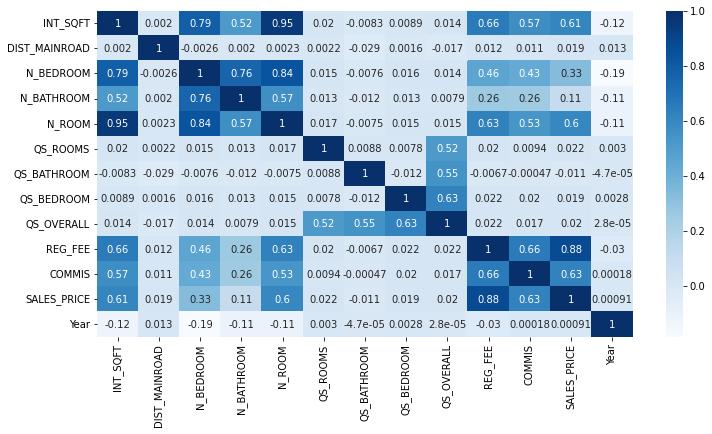

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [18]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Year
0,4,1004,131,1.0,1.0,3,0,1,2731,0,...,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000,2011
1,1,1986,26,2.0,1.0,5,0,0,4226,0,...,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770,2006
2,0,909,70,1.0,1.0,3,0,1,1511,0,...,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200,2012
3,6,1855,14,3.0,2.0,5,2,0,3300,2,...,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290,2010
4,4,1226,84,1.0,1.0,3,0,1,2406,2,...,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250,2009


In [19]:
x=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE']

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4976, 20), (2133, 20), (4976,), (2133,))

In [21]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)


In [22]:
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87320166, 0.88142292, 0.88896331, 0.87797833, 0.87720328])

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)


,model,best_score,best_params
0,linear_regression,0.879754,{'normalize': True}
1,lasso,0.879754,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.950286,"{'criterion': 'mse', 'splitter': 'random'}"


In [26]:
dtree=DecisionTreeRegressor(criterion= 'mse',splitter='random')

In [27]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', splitter='random')

In [30]:
y_predict=dtree.predict(x_test)

In [42]:
prediction=pd.DataFrame({'Target': y_test,'prediction': y_predict})

In [43]:
prediction

,Target,prediction
457,12948200,13397920.0
1876,7524750,7130000.0
6307,16434500,16271740.0
3182,6705750,5402500.0
1188,15831550,16070870.0
...,...,...
1973,12532900,11950520.0
336,11053290,10681680.0
4991,12994530,12508940.0
2877,9585000,7095250.0


In [60]:
dtree.score(x_test,y_test)

0.9524390361751349

**We get a better model at 95% score.**